# Name: Sunil Pradhan

## Project Name: Lending Club Loan Data Analysis

### OBJECTIVE-
For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("loan_data.csv")
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
df.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [6]:
df["purpose"].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le=LabelEncoder()
df["purpose"]=le.fit_transform(df["purpose"])
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [9]:
#Drop duplicated values
df=df.drop_duplicates()
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [10]:
df["credit.policy"].value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

Text(0.5, 1.0, 'Checking if the dataset is imbalanced or not')

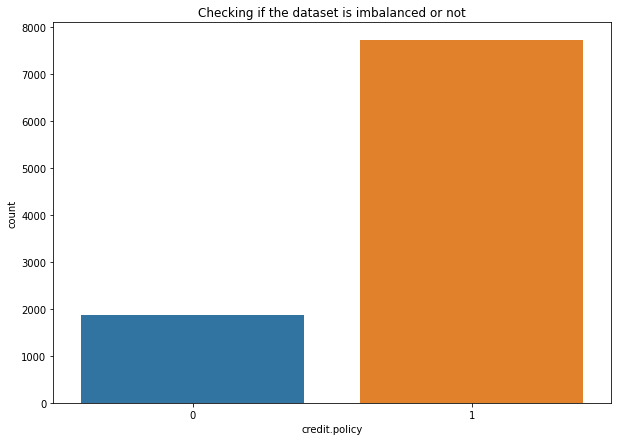

In [11]:
plt.figure(figsize=(10,7))
sns.countplot(df["credit.policy"])
plt.title("Checking if the dataset is imbalanced or not")

Text(0.5, 1.0, 'Checking correlation in the dataset')

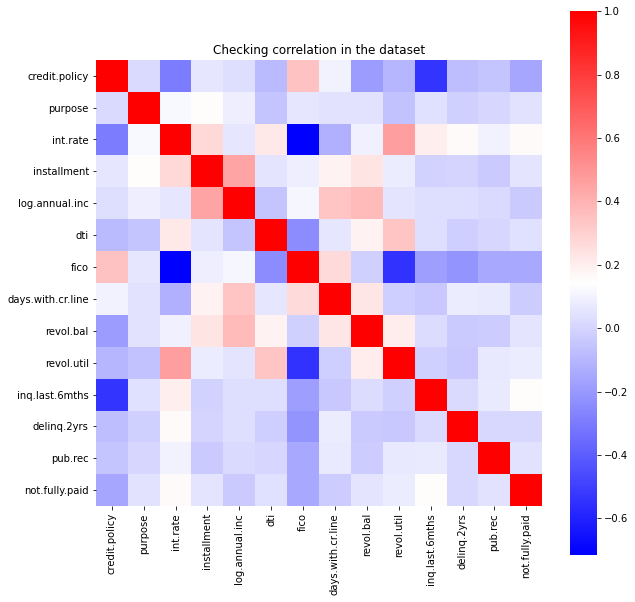

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(),cmap="bwr",square=True)
plt.title("Checking correlation in the dataset")

#### Since,no features have strong correlation.so, all the features are highly relevent and consider for model.

In [13]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x=df.drop("credit.policy",axis=1)
y=df[["credit.policy"]]

In [16]:
x.head()

,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [17]:
y.head()

,credit.policy
0,1
1,1
2,1
3,1
4,1


In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=25)

In [19]:
x_train.shape,x_test.shape

((7183, 13), (2395, 13))

In [20]:
y_train.shape,y_test.shape

((7183, 1), (2395, 1))

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

### Architect the model

In [23]:
import tensorflow

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [25]:
x_train.shape[1],

(13,)

In [26]:
model=Sequential()
model.add(Dense(64,activation="relu",input_shape=(x_train.shape[1],)))
model.add(Dense(32,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,521
Trainable params: 3,521
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [29]:
result=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100)
result

Epoch 1/100
225/225 [==============================] - 1s 3ms/step - loss: 0.3691 - accuracy: 0.8412 - val_loss: 0.2719 - val_accuracy: 0.8935
Epoch 2/100
225/225 [==============================] - 0s 2ms/step - loss: 0.2366 - accuracy: 0.9070 - val_loss: 0.2523 - val_accuracy: 0.9044
Epoch 3/100
225/225 [==============================] - 0s 2ms/step - loss: 0.2144 - accuracy: 0.9123 - val_loss: 0.2342 - val_accuracy: 0.9094
Epoch 4/100
225/225 [==============================] - 0s 2ms/step - loss: 0.1957 - accuracy: 0.9238 - val_loss: 0.2264 - val_accuracy: 0.9094
Epoch 5/100
225/225 [==============================] - 0s 2ms/step - loss: 0.1794 - accuracy: 0.9304 - val_loss: 0.2131 - val_accuracy: 0.9194
Epoch 6/100
225/225 [==============================] - 0s 2ms/step - loss: 0.1676 - accuracy: 0.9362 - val_loss: 0.1975 - val_accuracy: 0.9269
Epoch 7/100
225/225 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.9424 - val_loss: 0.1897 - val_accuracy: 0.9299

In [30]:
pred=(model.predict(x_test)>0.5)*1.0
pred

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [31]:
from sklearn.metrics import confusion_matrix,classification_report

In [32]:
print(confusion_matrix(pred,y_test))

[[ 406   56]
 [  60 1873]]


In [33]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

         0.0       0.87      0.88      0.88       462
         1.0       0.97      0.97      0.97      1933

    accuracy                           0.95      2395
   macro avg       0.92      0.92      0.92      2395
weighted avg       0.95      0.95      0.95      2395



In [34]:
df1=pd.DataFrame(result.history)
df1.head()

,loss,accuracy,val_loss,val_accuracy
0,0.369062,0.841153,0.271902,0.893528
1,0.236558,0.907003,0.252330,0.904384
2,0.214423,0.912293,0.234218,0.909395
3,0.195716,0.923848,0.226374,0.909395
4,0.179404,0.930391,0.213123,0.919415


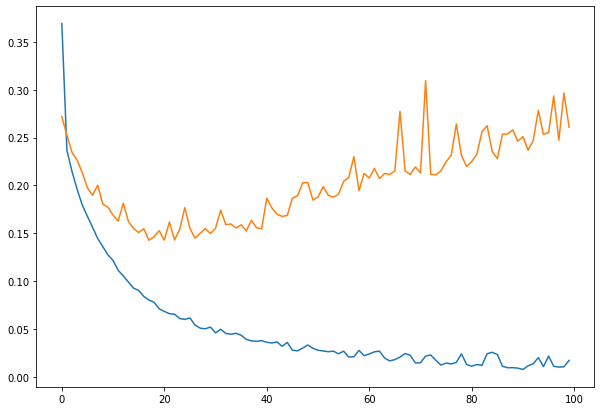

In [35]:
plt.figure(figsize=(10,7))
plt.plot(df1["loss"])
plt.plot(df1["val_loss"])

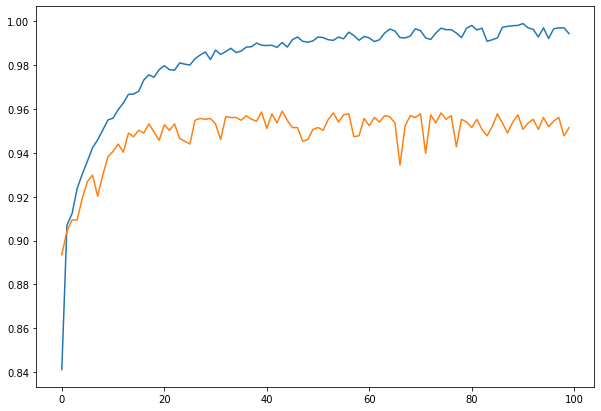

In [36]:
plt.figure(figsize=(10,7))
plt.plot(df1["accuracy"])
plt.plot(df1["val_accuracy"])

#          THANK YOU...!!!